In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# 1. describe, info and head --> quick look at the data
# also check .tail to see the last few observations and verify the data set is complete
# Check the shape of the dataset --> are train and test the same? obs difference is fine, columns = not

In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [9]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [10]:
"""
We learned the following:
- Data set seems to have missing entries (NaN)
- we have a large amount of categorical variables
- test and train datasets have same amount of variables except that the dependent variable does not exist
    in the test dataset. This makes sense as those are the answers that kaggle compares to our prediction

This means the following:
- We will have to fill in the missing values
- We may want to create dummy variables

"""

'\nWe learned the following:\n- Data set seems to have missing entries (NaN)\n- we have a large amount of categorical variables\n- test and train datasets have same amount of variables except that the dependent variable does not exist\n    in the test dataset. This makes sense as those are the answers that kaggle compares to our prediction\n\nThis means the following:\n- We will have to fill in the missing values\n- We may want to create dummy variables\n\n'

In [11]:
# splitting the train dataset into numerical variables and categorical
# This way we can deal with the found issues easier
numeric_features = train.select_dtypes(include=['int64', 'float64'])
categorical_features = train.select_dtypes(include=['object'])

In [12]:
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

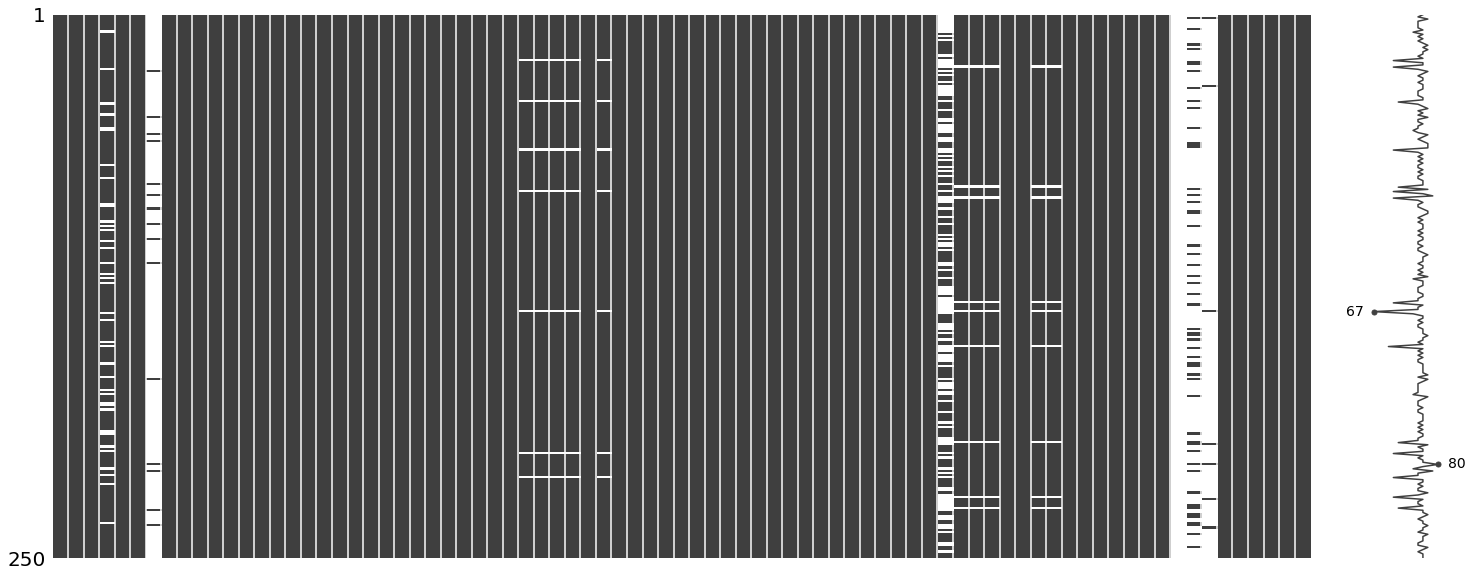

In [13]:
# This gives a quick overview as to where the missing values are at

# We see that some variables have an extremely large amount of missing values!
# This makes an argument for deleting those variables, however we would lose data and that is not preferable.
msno.matrix(train.sample(250))

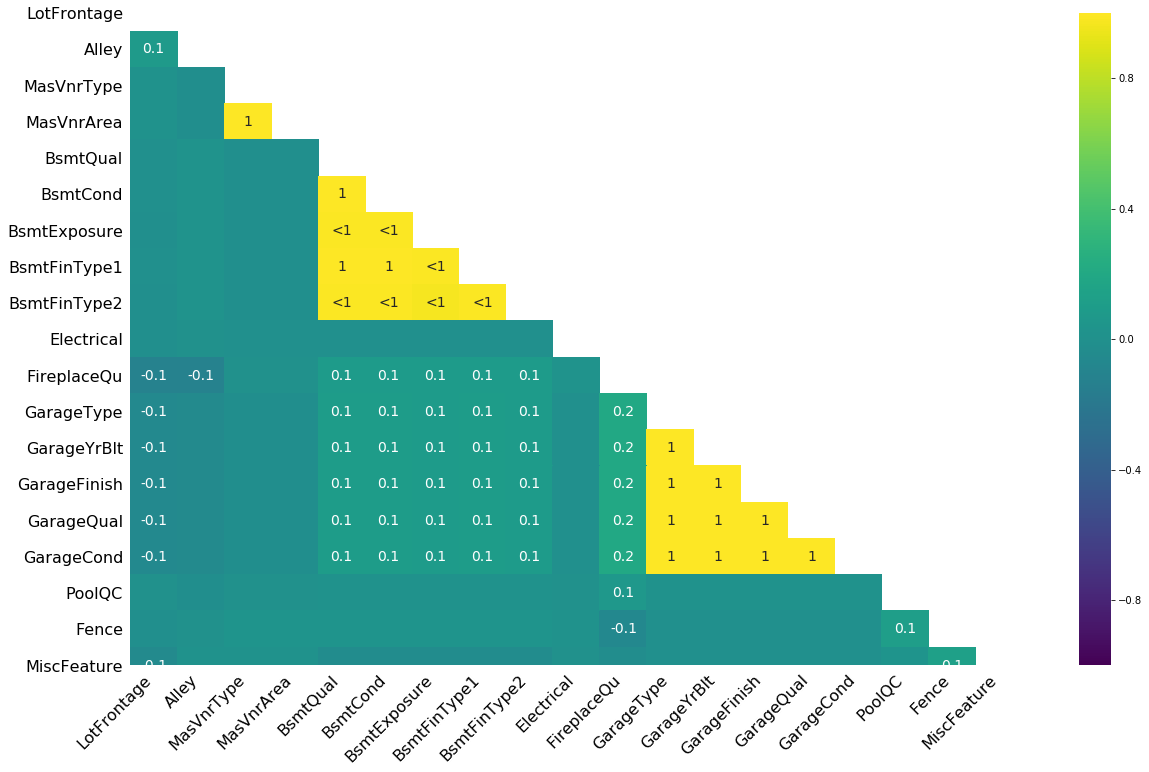

In [14]:
# shows correlation in missing values. 1 = if one is missing, the other one is too
# -1 = if one is missing, the other one is not.
# this gives an easy overlook, but does not work well with large datasets

# We can see some interesting correlations between variables that seem to hold very similair information!
msno.heatmap(train, cmap='viridis')

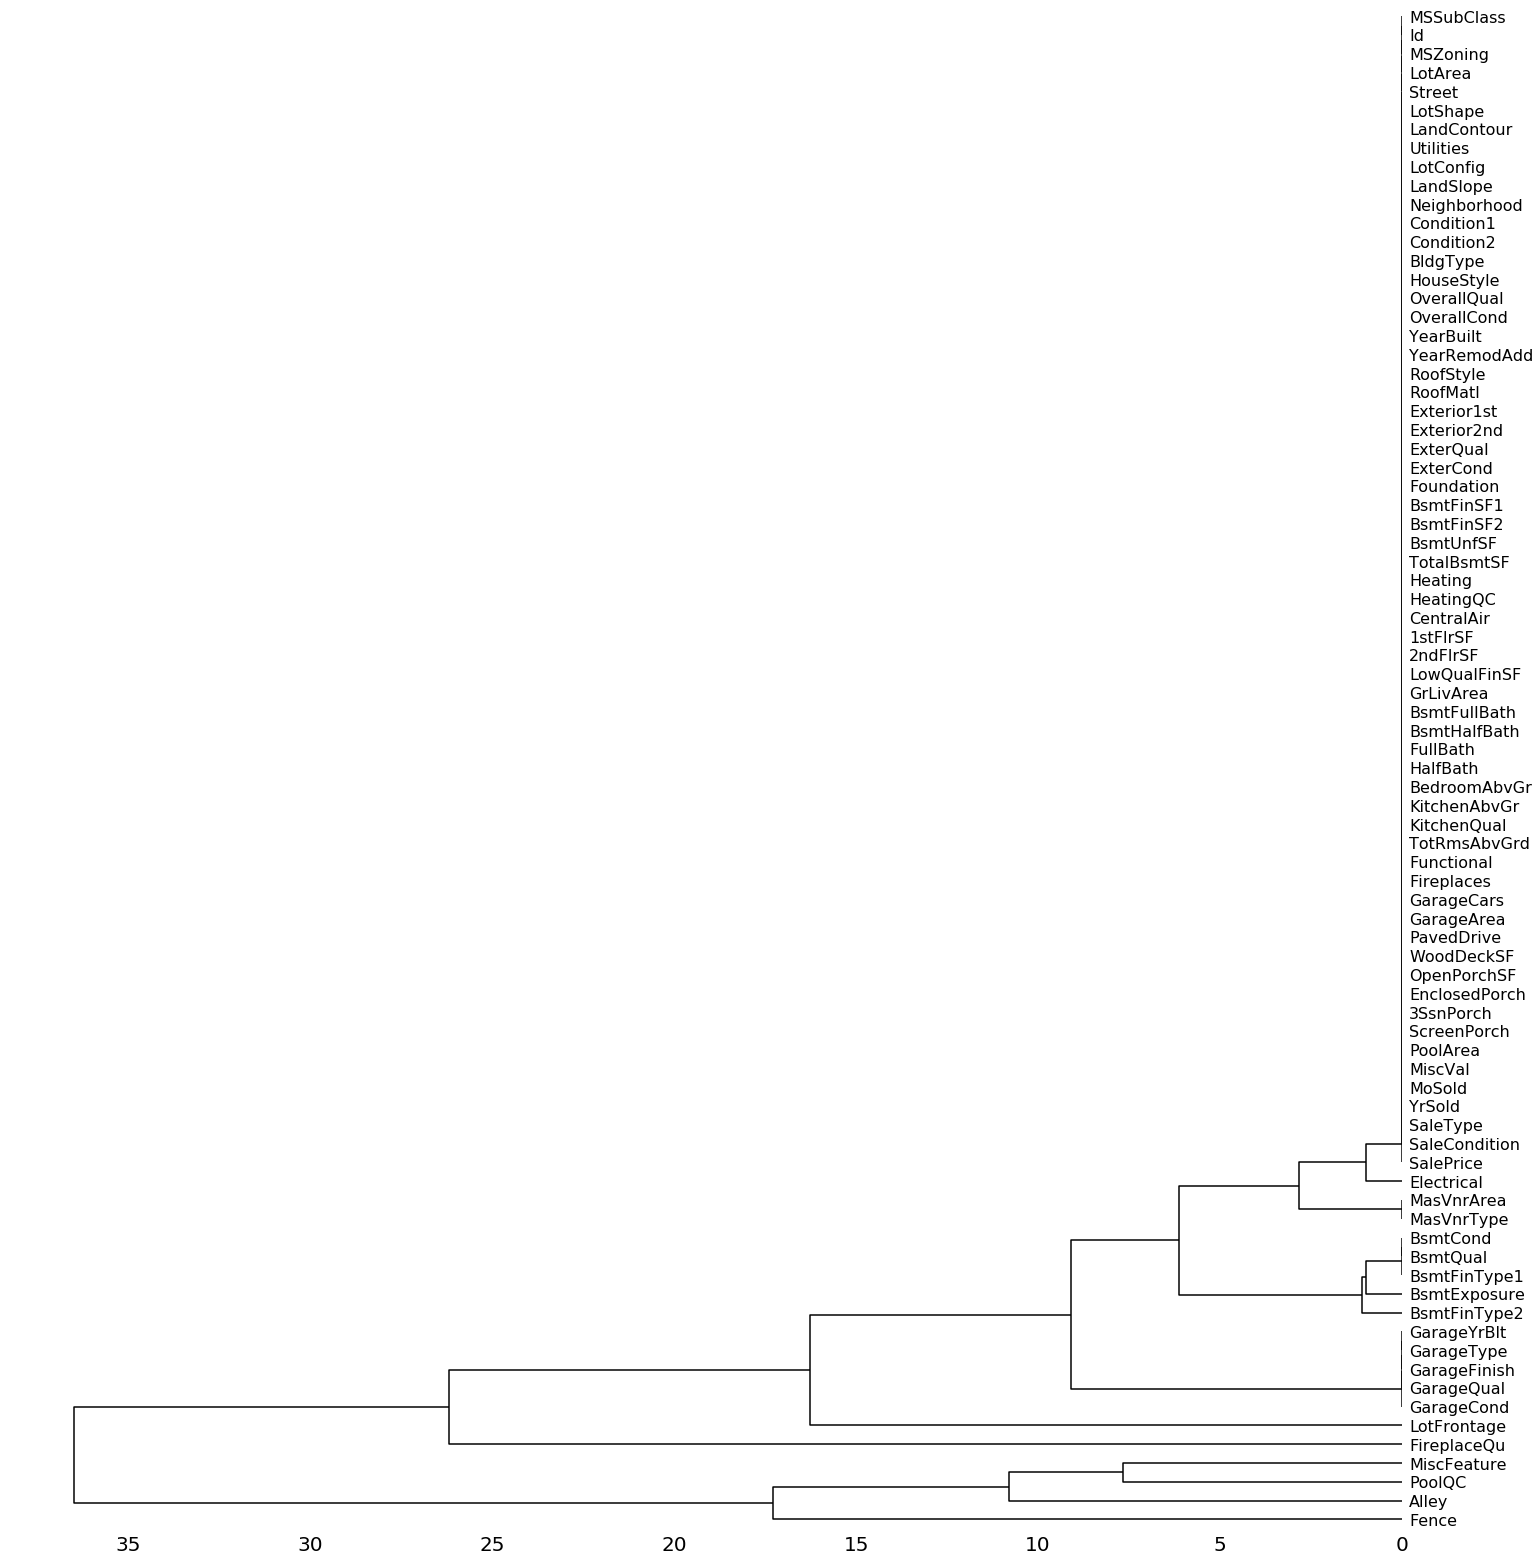

In [15]:
# works with large datasets
# shows relation in missing values.
# the closer to 0 the relation is at, the strong the correlation in missing value
# see that the Garage-variables very strongly predict each other missing values
msno.dendrogram(train)

In [16]:
"""
We learned the following:
- some variables have large amount of missing values
- some variables are very strongly correlated in missing values

"""

'\nWe learned the following:\n- some variables have large amount of missing values\n- some variables are very strongly correlated in missing values\n\n'

In [17]:
# Normal Distribution and Outliers
# .skew shows normalDistr. 0 = perfectlly normal distributed --> MiscVal is very far from normalDistr.
# .kurt shows the slope (outliers). High positive = long right-sided slope
# see that MiscVal has a long right slope (in addition to far from normalDistr.)

# most import is dependent var = SalePrice. skew = 1.88, kurt=6.54
# we have some worries whether the distribution is Gaussian --> explore further
train.skew(), train.kurt()

(Id                0.000000
 MSSubClass        1.407657
 LotFrontage       2.163569
 LotArea          12.207688
 OverallQual       0.216944
 OverallCond       0.693067
 YearBuilt        -0.613461
 YearRemodAdd     -0.503562
 MasVnrArea        2.669084
 BsmtFinSF1        1.685503
 BsmtFinSF2        4.255261
 BsmtUnfSF         0.920268
 TotalBsmtSF       1.524255
 1stFlrSF          1.376757
 2ndFlrSF          0.813030
 LowQualFinSF      9.011341
 GrLivArea         1.366560
 BsmtFullBath      0.596067
 BsmtHalfBath      4.103403
 FullBath          0.036562
 HalfBath          0.675897
 BedroomAbvGr      0.211790
 KitchenAbvGr      4.488397
 TotRmsAbvGrd      0.676341
 Fireplaces        0.649565
 GarageYrBlt      -0.649415
 GarageCars       -0.342549
 GarageArea        0.179981
 WoodDeckSF        1.541376
 OpenPorchSF       2.364342
 EnclosedPorch     3.089872
 3SsnPorch        10.304342
 ScreenPorch       4.122214
 PoolArea         14.828374
 MiscVal          24.476794
 MoSold            0

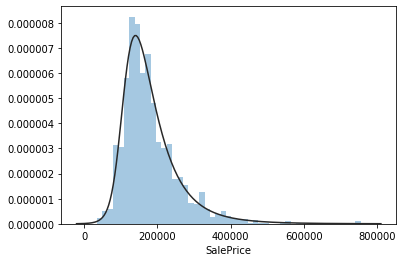

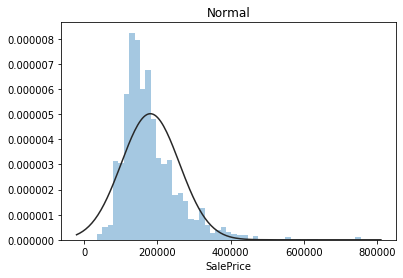

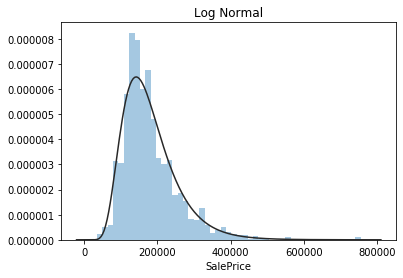

In [18]:
# due to our worries regarding normal dist of y, we plot y in 3 ways:
# Johnson SU, Normal and LogNormal
# Clearly not normalDistr. we see the best fit with Johnson SU distribution
# We need a normal/gaussian distribution for many tests. This means we need to transform the data into Gaussian
    # in the preprocessing phase or we need to use non-Parametric statistical methods instead
# But we should first use statistical tests to truly determine whether its normally distributed (use a Shapiro-Wilk test)
y = train['SalePrice']
plt.figure(1);
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

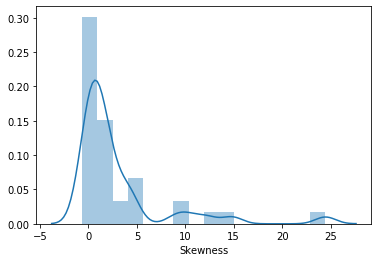

In [19]:
# put the skew() of all variables into a distribution plot to see its distribution of skew()
# we see some very high skews
sns.distplot(train.skew(), axlabel  = "Skewness")

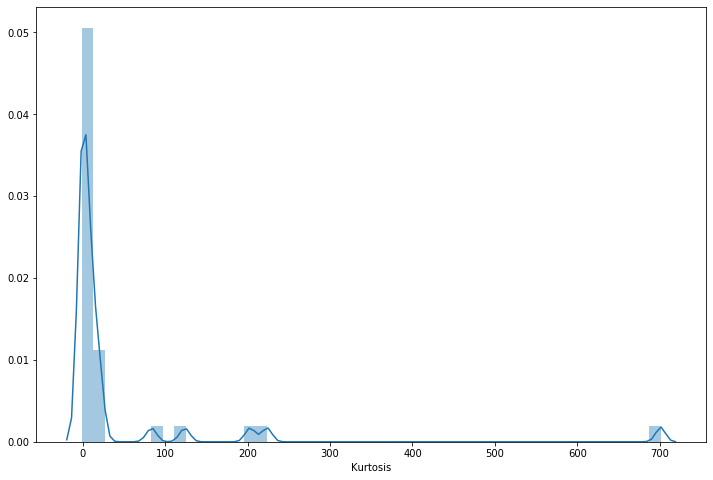

In [20]:
# put the kurt() of all  variables into distribution plot to see its distribution
# again some very high scores --> outliers!
plt.figure(figsize=(12,8))
sns.distplot(train.kurt(), axlabel = 'Kurtosis')

In [21]:
"""

At this point we know the following:
- our data is not normally distributed
- our data has some big outliers
- JohnsonSU distribution seems to work best out of the three tested. But a good approach would most likely be to
    attempt to normalize the data
"""

'\n\nAt this point we know the following:\n- our data is not normally distributed\n- our data has some big outliers\n- JohnsonSU distribution seems to work best out of the three tested. But a good approach would most likely be to\n    attempt to normalize the data\n'

In [22]:
# 5. Correlations
# lets check correlation of the numerical variables (cant do with categorical) with dependent variable
# We see some strong correlations, and some very weak ones
# lets zoom in with correlation heat map, zoomed heat map, pair plot and scatter plot

correlation = numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending = False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

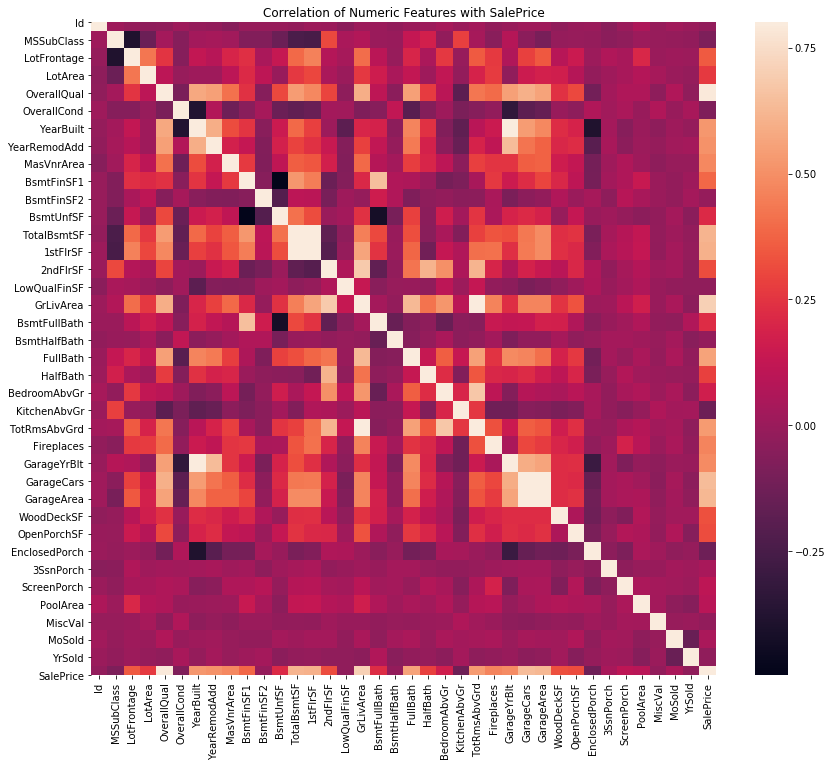

In [23]:
# heatmap for quick view
# seem to be some extreme correlations!
plt.figure(figsize=(14,12))
plt.title('Correlation of Numeric Features with SalePrice')


sns.heatmap(correlation, vmax=.8 )

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


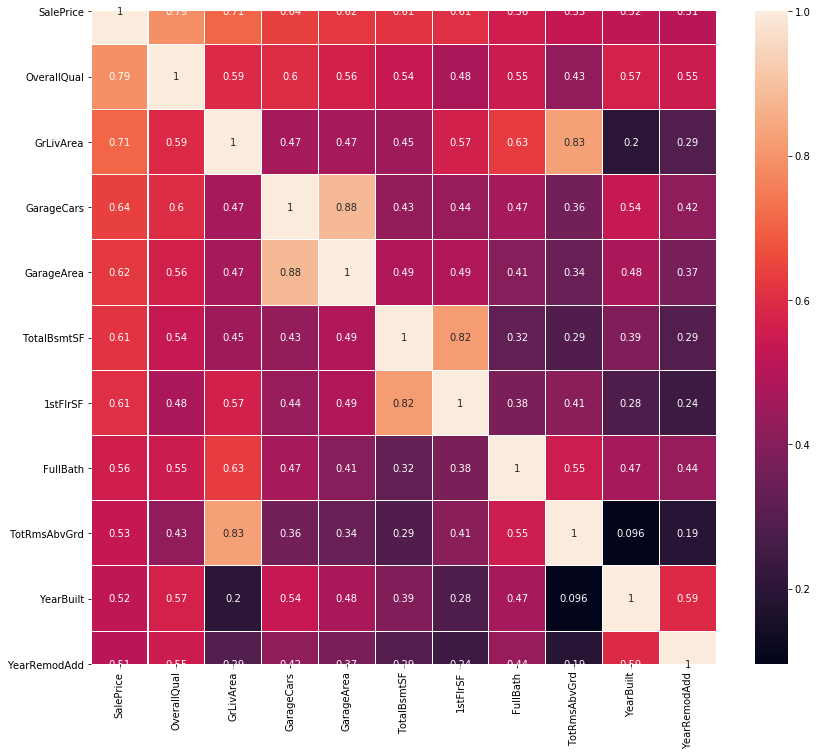

In [24]:
# 11 largest correlations with saleprice from the saleprice dataset
cols = correlation.nlargest(11,'SalePrice')['SalePrice'].index
print(cols)

# puts all the correlations into a variable
cm = np.corrcoef(train[cols].values.T)

plt.figure(figsize= (14,12))

sns.heatmap(cm, linewidths = .01, annot=True, xticklabels = cols.values, yticklabels= cols.values)

# GarageCars and GarageArea are strongly correlated (makes sense)
# GrLivArea and TotRmsAbvGrd are stongly correlated
# 1stFlrSF and TotalBsmtSF are strongly correlated (makes sense)

# GarageCars and Area basically predict the same thing (logic), we coulddrop the one with lower corr toy = drop GarageArea
# 1stFlrSF and TotalBsmtSF predict the same too, we could drop the lower corr with y = drop 1stFloor

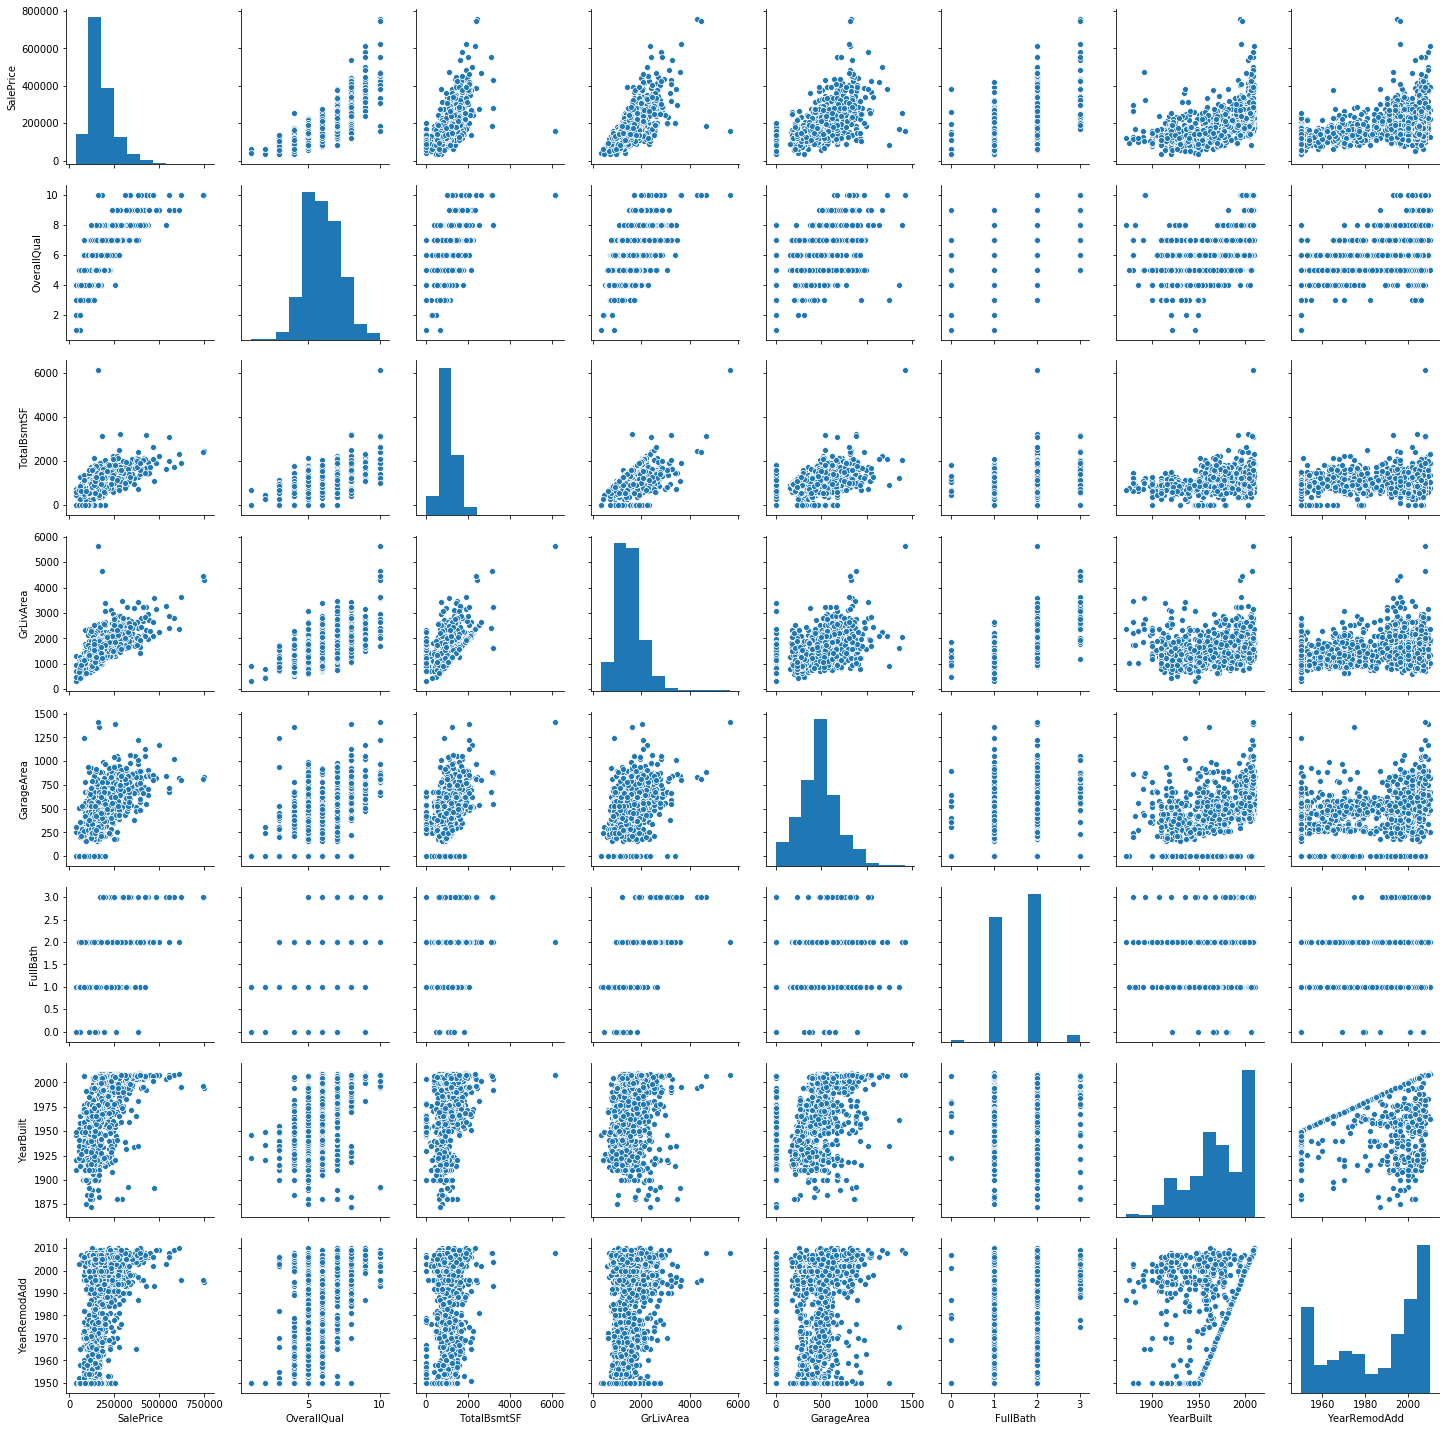

In [25]:
# pairplot with leftover columns of high correlations with y
columns = ['SalePrice', 'OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'FullBath', 'YearBuilt','YearRemodAdd']
sns.pairplot(train[columns])

In [26]:
# Above we see something interesting:
# TotalBsmtSF and GrLiveArea have a bottom/upper line --> makes sense as one limits the other

In [27]:
# preparation for preprocessing --> finding the missing values

In [28]:
# Missing values of the numerical variables
total = numeric_features.isnull().sum().sort_values(ascending=False)
percent = (numeric_features.isnull().sum()/numeric_features.isnull().count()).sort_values(ascending=False)
           
missing_data = pd.concat([total, percent], axis=1, join = 'outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name = ' Numeric Feature'
missing_data.head(20)

,Total Missing Count,% of Total Observations
Numeric Feature,,
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
BsmtFinSF1,0,0.000000
LowQualFinSF,0,0.000000
2ndFlrSF,0,0.000000
1stFlrSF,0,0.000000
TotalBsmtSF,0,0.000000
BsmtUnfSF,0,0.000000


In [29]:
# missing values of the categorical variables
# we can see for some variables that almost all observations are NaN
total = categorical_features.isnull().sum().sort_values(ascending=False)
percent = (categorical_features.isnull().sum()/categorical_features.isnull().count()).sort_values(ascending=False)
           
missing_data = pd.concat([total, percent], axis=1, join = 'outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name = ' Numeric Feature'
missing_data.head(20)

,Total Missing Count,% of Total Observations
Numeric Feature,,
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
GarageCond,81,0.055479
GarageQual,81,0.055479
GarageFinish,81,0.055479
GarageType,81,0.055479


In [30]:
# Normality assumption, if fails --> need to either transform data or use Nonparametric statistical methods
# Shapiro-Wilks test for normality
# H0 = Gaussian true, H1 = Gaussian not true
# H0 clearly fails --> SalePrice is not Gaussian

p = st.shapiro(train['SalePrice'])
alpha = .05
print(p)
if p[1] > alpha:
    print('Gaussian holds')
else:
    print('Gaussian fails')

(0.869671642780304, 3.206247534576162e-33)
Gaussian fails


Text(0.5, 1.0, 'Regular')

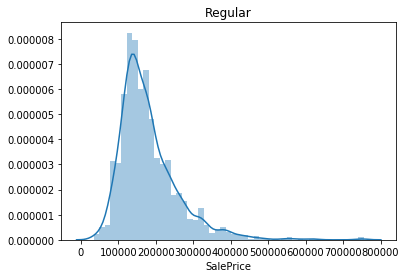

In [31]:
sns.distplot(train['SalePrice'])
plt.title('Regular')

In [32]:
# Lets attempt a Log1p transformation to normalize the data
train['Gaussian'] = np.log1p(train['SalePrice'])
p = st.shapiro(train['Gaussian'])
print(p)
alpha = .05
if p[1] > alpha:
    print('Gaussian holds')
else:
    print('Gaussian fails')

(0.9912054538726807, 1.1467612637261482e-07)
Gaussian fails


Text(0.5, 1.0, 'log1p')

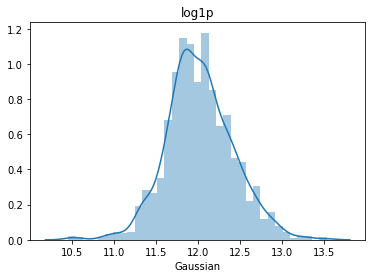

In [33]:
# log1p does a lot better
sns.distplot(train['Gaussian'])
plt.title('log1p')

In [34]:
# D'Agostino and Pearson's Test for normality, Always good to use multiple tests
# Gaussian fails

p = st.normaltest(train['SalePrice'])
print(p[1])
alpha = .05
if p[1] > alpha:
    print('Gaussian holds, does NOT reject H0')
else:
    print('Gaussian fails, reject H0')

2.283848353787728e-133
Gaussian fails, reject H0


In [35]:
# Anderson-Darling Test for normality

p = st.anderson(train['SalePrice'])
alpha = .05
print('Statistic: %.3f' % p.statistic)

for i in range(len(p.critical_values)):
    sl, cv = p.significance_level[i], p.critical_values[i]
    if p.statistic < p.critical_values[i]:
        print('data looks normal(fails to reject H0)', (sl, cv))
    else:
        print('data does not look normal (rejects H0)',  (sl, cv))

Statistic: 41.692
data does not look normal (rejects H0) (15.0, 0.574)
data does not look normal (rejects H0) (10.0, 0.654)
data does not look normal (rejects H0) (5.0, 0.785)
data does not look normal (rejects H0) (2.5, 0.916)
data does not look normal (rejects H0) (1.0, 1.089)


In [36]:
# All normality tests show that the data is not normal/Gaussian distributed
# Data thus needs to be transformed or we need to use non-parametric statistical methods

OverallQual     0.216944
MoSold          0.212053
BedroomAbvGr    0.211790
GarageArea      0.179981
Gaussian        0.121347
YrSold          0.096269
FullBath        0.036562
Id              0.000000
GarageCars     -0.342549
YearRemodAdd   -0.503562
YearBuilt      -0.613461
GarageYrBlt    -0.649415
dtype: float64


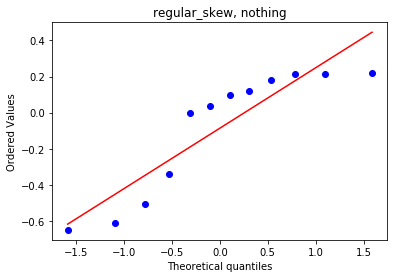

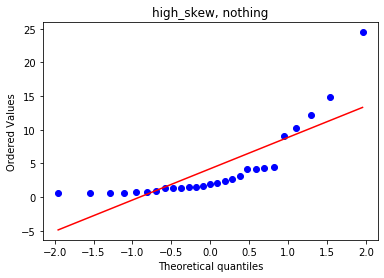

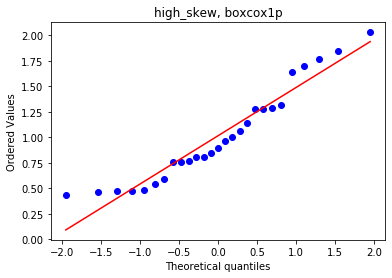

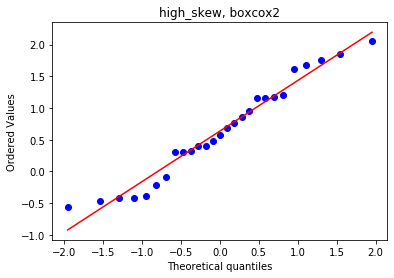

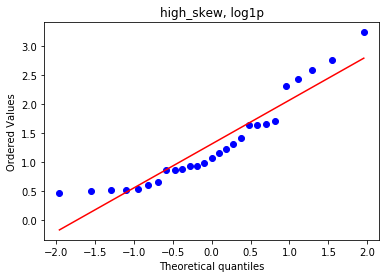

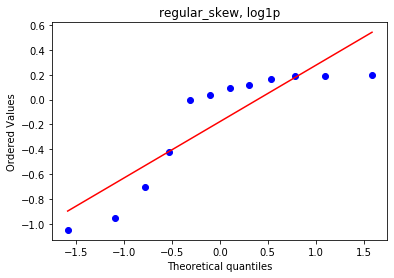

In [37]:
import pylab
from scipy.stats import skew
from scipy.stats import norm
from scipy import stats

skew_features = train.skew().sort_values(ascending=False)

regular_skew = skew_features[skew_features <= .5]

print(regular_skew)

high_skew = skew_features[skew_features>.5]


stats.probplot(regular_skew, dist='norm', plot=pylab)
plt.title('regular_skew, nothing')
pylab.show()

stats.probplot(high_skew, dist='norm', plot=pylab)
plt.title('high_skew, nothing')
pylab.show()


from scipy.special import boxcox1p
#from scipy.special import boxcox_normmax

skewed_box_cox2, lmda = stats.boxcox(high_skew)
skewed_box_cox = boxcox1p(high_skew, stats.boxcox_normmax(high_skew))


stats.probplot(skewed_box_cox, dist='norm', plot=pylab)
plt.title('high_skew, boxcox1p')
pylab.show()
#print ("lambda parameter for Box-Cox Transformation is:",lmda)

# WINNER
stats.probplot(skewed_box_cox2, dist='norm', plot=pylab)
plt.title('high_skew, boxcox2')
pylab.show()
#print ("lambda parameter for Box-Cox Transformation is:",lmda)

log1p = np.log1p(high_skew)
stats.probplot(log1p, dist='norm', plot=pylab)
plt.title('high_skew, log1p')
pylab.show()

double = np.log1p(regular_skew)

stats.probplot(double, dist='norm', plot=pylab)
plt.title('regular_skew, log1p')
pylab.show()


In [38]:
# This suggests that boxcox2 is the best transformation to use in order to normalize the data

In [39]:
# Next phase: Preprocessing and predicting

In [40]:
# Seeding so as to observe the effect of changes in the model
from numpy.random import seed
np.random.seed(42)

In [41]:
correlation = train.corr()
cols = correlation.nlargest(11,'SalePrice')['SalePrice'].index

cm = np.corrcoef(train[cols].values.T)

In [42]:
# Drop Id, as it is not a predictive variable in any way 
train_ID = train['Id']
test_ID =  test['Id']
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [43]:
# There are some huge outliers, lets remove those observations as they negatively impact our model
train = train[train['GrLivArea']<4500]
train.reset_index(drop=True, inplace=True)

In [44]:
# Scale the dependent variable so as to be in line with target metric RMSE
# Create y and features list (not X yet, we have to engineer that one)
train['SalePrice'] = np.log1p(train['SalePrice'])
y=train['SalePrice']
train_features = train.drop('SalePrice', axis=1)
test_features = test

In [45]:
# put them together so that we only have to do the work once
# we will split them up later again (the first 1460 are from train, the 1459 after are from test)

features = pd.concat([train_features, test_features], axis=0)
features = features.drop('GarageArea', axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [46]:
# split up in numeric and categorical, as we need to treat
# those differently before putting both of them in X

numeric_t = features.select_dtypes(include=['int64', 'float64'])
char_t = features.select_dtypes(include=['object'])

In [47]:
# Reading from the variable description file, we see that this is not a true numerical variable!
features['MSSubClass'] = features['MSSubClass'].astype(str)

In [48]:
# these have actual missing values (read their description)
# filling in their missing values with most found score

features['Functional'].fillna(features['Functional'].mode()[0], inplace=True)
features['Electrical'].fillna(features['Electrical'].mode()[0], inplace=True)
features['KitchenQual'].fillna(features['KitchenQual'].mode()[0], inplace=True)
features['Utilities'].fillna(features['Utilities'].mode()[0], inplace=True)
features['MSZoning'].fillna(features['MSZoning'].mode()[0], inplace=True)
features['MasVnrType'].fillna(features['MasVnrType'].mode()[0], inplace=True)
features['Exterior1st'].fillna(features['Exterior1st'].mode()[0], inplace=True)
features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0], inplace=True)
features['SaleType'].fillna(features['SaleType'].mode()[0], inplace=True)

In [49]:
# numerical variables. Description says missing = 0 --> fill in 0
for col in ('GarageYrBlt', 'GarageCars'):
    features[col] = features[col].fillna(0)

In [50]:
# Fill in missing variables with the median
features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

for col in ('TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF'):
    features[col] = features[col].fillna(features[col].median())

In [51]:
# missing values are 0
features['MasVnrArea'].fillna(0, inplace=True)

for col in ('BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2','BsmtFinType1'):
    features[col] = features[col].fillna(0)
for col in ('GarageType', 'GarageFinish','GarageCond','GarageQual'):
    features[col] = features[col].fillna(0)
for col in ('FireplaceQu','Fence','Alley','MiscFeature','PoolQC'):
    features[col] = features[col].fillna(0)

In [52]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics2.append(i)

In [53]:
import pylab
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# make a list of skew and put the high ones in a special list
skew_features = features[numerics2].skew().sort_values(ascending=False)
high_skew = skew_features[skew_features>.5]

high_skew_index = high_skew.index

for i in high_skew_index:
    features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))

C:\Users\wiege\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\wiege\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [54]:
# Creating our dummies
final_features = pd.get_dummies(features).reset_index(drop=True)

In [55]:
# Splitting the dataset up again
X = final_features.iloc[:len(y), :]
x_sub = final_features.iloc[len(X):, :]

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [57]:
# defining score test function
def rmsle(y_test, predictions):
    return np.sqrt(mean_squared_error(y_test, predictions))

In [60]:
# preparing for cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [61]:
from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [73]:
# Gridsearch to find good parameters. Keeping the seed
np.random.seed(42)

model = XGBRegressor()
from sklearn.model_selection import KFold
kfolds = KFold(n_splits=10, shuffle=True)

param_grid= {'n_estimators':[3000],
             'max_depth':[3],
            'learning_rate':[0.01],
             'objective':['reg:linear'],
             'gamma':[0],
             'min_child_weight': [2],
             'max_delta_step': [2],
             'subsample': [0.8],
             'colsample_bytree': [0.8],
             'reg_alpha': [0.08],
             'reg_lambda': [0.6]
            }
grid = GridSearchCV(model, param_grid=param_grid, cv=kfolds, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid.fit(X_train,y_train)

print("Best: %f using %s" % (np.sqrt(-grid.best_score_), grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
XGB_best = grid.best_estimator_
for mean, stdev, param in zip(np.sqrt(-means), stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   47.5s finished


[07:15:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Best: 0.025375 using {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_delta_step': 2, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 3000, 'objective': 'reg:linear', 'reg_alpha': 0.08, 'reg_lambda': 0.6, 'subsample': 0.8}
0.025375 (0.000646) with: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_delta_step': 2, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 3000, 'objective': 'reg:linear', 'reg_alpha': 0.08, 'reg_lambda': 0.6, 'subsample': 0.8}


In [74]:
# Gridsearch with Lasso, keeping seed
np.random.seed(42)

from sklearn.linear_model import Lasso
model=Lasso()

param_grid = {'alpha': [.00055],
             'max_iter':[100]}
grid = GridSearchCV(model, param_grid=param_grid, cv=kfolds, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid.fit(X_train,y_train)

print("Best: %f using %s" % (np.sqrt(-grid.best_score_), grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
lasso_best = grid.best_estimator_
for mean, stdev, param in zip(np.sqrt(-means), stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best: 0.003416 using {'alpha': 0.00055, 'max_iter': 100}
0.003416 (0.000003) with: {'alpha': 0.00055, 'max_iter': 100}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3750773260871798, tolerance: 0.014331416631038997
  positive)


In [75]:
# Gridsearch BoostingRegressor, keeping seed
np.random.seed(42)

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

param_grid = {'n_estimators':[6200],
              'learning_rate': [.05],
              'max_depth': [2.2],
              'min_samples_split': [14],
              'max_features': ['sqrt'],
              'min_samples_leaf': [5],
              'loss': ['huber']
             }
grid=GridSearchCV(model, param_grid=param_grid,cv=kfolds, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid.fit(X_train,y_train)


print("Best: %f using %s" % (np.sqrt(-grid.best_score_), grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
gbdt_best=grid.best_estimator_
for mean, stdev, param in zip(np.sqrt(-means), stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   14.5s finished


Best: 0.076176 using {'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 2.2, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 14, 'n_estimators': 6200}
0.076176 (0.001039) with: {'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 2.2, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 14, 'n_estimators': 6200}


In [76]:
# Gridsearch Ridge, keeping seed
np.random.seed(42)

from sklearn.linear_model import Ridge
model = Ridge()

param_grid = {'alpha': [16.5],
             'max_iter':[100]}
grid = GridSearchCV(model, param_grid=param_grid, cv=kfolds, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid.fit(X_train,y_train)

print("Best: %f using %s" % (np.sqrt(-grid.best_score_), grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
ridge_best = grid.best_estimator_
for mean, stdev, param in zip(np.sqrt(-means), stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best: 0.076456 using {'alpha': 16.5, 'max_iter': 100}
0.076456 (0.001402) with: {'alpha': 16.5, 'max_iter': 100}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [77]:
# Gridsearch ElasticNet, keeping seed
np.random.seed(42)

from sklearn.linear_model import ElasticNet
model=ElasticNet()
param_grid = {'alpha': [.0005,.001, 0.02],
             'l1_ratio': [.42,.43,.44]
             }
grid = GridSearchCV(model, param_grid=param_grid, cv=kfolds, scoring = 'neg_mean_squared_error', n_jobs=-1, verbose=1)
grid.fit(X_train,y_train)

print("Best: %f using %s" % (np.sqrt(-grid.best_score_), grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
ela_best = grid.best_estimator_
for mean, stdev, param in zip(np.sqrt(-means), stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Best: 0.003448 using {'alpha': 0.0005, 'l1_ratio': 0.44}
0.003469 (0.000003) with: {'alpha': 0.0005, 'l1_ratio': 0.42}
0.003458 (0.000003) with: {'alpha': 0.0005, 'l1_ratio': 0.43}
0.003448 (0.000003) with: {'alpha': 0.0005, 'l1_ratio': 0.44}
0.006820 (0.000010) with: {'alpha': 0.001, 'l1_ratio': 0.42}
0.006803 (0.000010) with: {'alpha': 0.001, 'l1_ratio': 0.43}
0.006785 (0.000010) with: {'alpha': 0.001, 'l1_ratio': 0.44}
0.086061 (0.001542) with: {'alpha': 0.02, 'l1_ratio': 0.42}
0.086513 (0.001559) with: {'alpha': 0.02, 'l1_ratio': 0.43}
0.086962 (0.001577) with: {'alpha': 0.02, 'l1_ratio': 0.44}


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.8s finished


In [78]:
# Gridsearch SVR, keeping seed
np.random.seed(42)

from sklearn.svm import SVR
model=SVR()
param_grid = {'C':[19],
             'gamma': [.0002]}
grid= GridSearchCV(model, param_grid=param_grid, cv=kfolds, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid.fit(X_train,y_train)

print("Best: %f using %s" % (np.sqrt(-grid.best_score_), grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
svr_best = grid.best_estimator_
for mean, stdev, param in zip(np.sqrt(-means), stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


Best: 0.273171 using {'C': 19, 'gamma': 0.0002}
0.273171 (0.016467) with: {'C': 19, 'gamma': 0.0002}


In [79]:
# Blending the model in an effort to get superior results
def blend_models_predict(X_test):
    return ((0 * XGB_best.predict(X_test))+ \
           (.34 * lasso_best.predict(X_test))+ \
           (0 * gbdt_best.predict(X_test))+ \
           (.33 * ridge_best.predict(X_test)) + \
           (.33 * ela_best.predict(X_test)) + \
           (.0 * svr_best.predict(X_test)))

print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))

print('Predict submission:')

RMSLE score on train data:
0.023627145599125886
Predict submission:


In [ ]:
# Creating submission file to upload to Kaggle
submission_predictions = pd.DataFrame(data=test_ID, columns=['Id'])
submission_predictions['SalePrice'] = what
submission_predictions.to_csv('submissionCombined2.csv', index=False)